In [44]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [180]:
import pandas as pd
path= "/content/drive/MyDrive/Untitled folder/cbb.csv"
df= pd.read_csv(path)
df.describe

<bound method NDFrame.describe of                 TEAM  CONF   G   W  ADJOE  ADJDE  BARTHAG  EFG_O  EFG_D   TOR  \
0     North Carolina   ACC  40  33  123.3   94.9   0.9531   52.6   48.1  15.4   
1          Wisconsin   B10  40  36  129.1   93.6   0.9758   54.8   47.7  12.4   
2           Michigan   B10  40  33  114.4   90.4   0.9375   53.9   47.7  14.0   
3         Texas Tech   B12  38  31  115.2   85.2   0.9696   53.5   43.0  17.7   
4            Gonzaga   WCC  39  37  117.8   86.3   0.9728   56.6   41.1  16.2   
...              ...   ...  ..  ..    ...    ...      ...    ...    ...   ...   
3518          Toledo   MAC  34  27  119.9  109.6   0.7369   56.3   52.9  13.6   
3519         Liberty  ASun  33  27  111.4   97.3   0.8246   55.5   49.3  16.0   
3520     Utah Valley   WAC  34  28  107.1   94.6   0.8065   51.7   44.0  19.3   
3521             UAB  CUSA  38  29  112.4   97.0   0.8453   50.3   47.3  17.3   
3522     North Texas  CUSA  36  31  110.0   93.8   0.8622   51.2   44.5  19

In [181]:
df.isnull().sum()


TEAM             0
CONF             0
G                0
W                0
ADJOE            0
ADJDE            0
BARTHAG          0
EFG_O            0
EFG_D            0
TOR              0
TORD             0
ORB              0
DRB              0
FTR              0
FTRD             0
2P_O             0
2P_D             0
3P_O             0
3P_D             0
ADJ_T            0
WAB              0
POSTSEASON    2843
SEED          2843
YEAR             0
dtype: int64

In [182]:
X = df[['EFG_O','EFG_D','TOR','TORD']]
X
df['EFG_D'] = -df['EFG_D']
df['TOR'] = -df['TOR']
X

,EFG_O,EFG_D,TOR,TORD
0,52.6,48.1,15.4,18.2
1,54.8,47.7,12.4,15.8
2,53.9,47.7,14.0,19.5
3,53.5,43.0,17.7,22.8
4,56.6,41.1,16.2,17.1
...,...,...,...,...
3518,56.3,52.9,13.6,18.3
3519,55.5,49.3,16.0,18.9
3520,51.7,44.0,19.3,16.3
3521,50.3,47.3,17.3,19.3


In [183]:
Y = df[['W']]
Y

,W
0,33
1,36
2,33
3,31
4,37
...,...
3518,27
3519,27
3520,28
3521,29


In [184]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test= train_test_split(X,Y, test_size=0.3, random_state=42)
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,Y_train)


LinearRegression()

In [185]:
C= lr.intercept_
C

array([23.87560526])

In [186]:
B=lr.coef_
B

array([[ 1.04285916, -1.13721775, -0.81512015,  0.65661912]])

In [187]:
y_pred_train= lr.predict(X_train)


<function matplotlib.pyplot.show(close=None, block=None)>

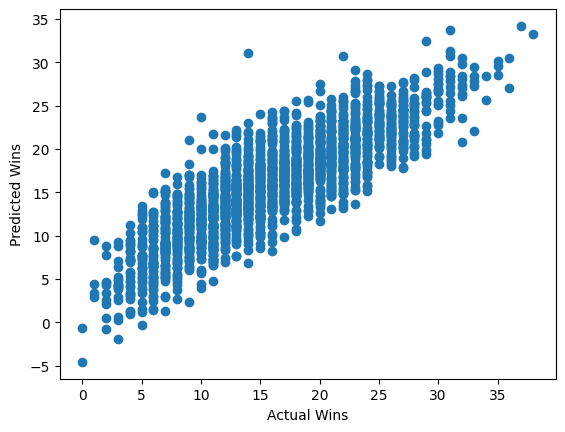

In [188]:
import matplotlib.pyplot as plt
plt.scatter(Y_train, y_pred_train)
plt.xlabel("Actual Wins")
plt.ylabel("Predicted Wins")
plt.show

In [189]:
from sklearn.metrics import r2_score

In [190]:
r2_score(Y_train, y_pred_train)
#Correlation between composite of all independent variables and dependent variable wins

0.7255062024569519

In [191]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

model = LinearRegression()
model.fit(X, Y)

# Make predictions
predictions = model.predict(X)

# Calculate and print metrics
mse = mean_squared_error(Y, predictions)
rmse = np.sqrt(mse)

r2 = r2_score(Y, predictions)

print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')
print(f'R-squared: {r2:.2f}')

Mean Squared Error (MSE): 11.81
Root Mean Squared Error (RMSE): 3.44
R-squared: 0.73


In [192]:
X = df[['EFG_O']]
X

,EFG_O
0,52.6
1,54.8
2,53.9
3,53.5
4,56.6
...,...
3518,56.3
3519,55.5
3520,51.7
3521,50.3


In [193]:
Y = df[['W']]
Y

,W
0,33
1,36
2,33
3,31
4,37
...,...
3518,27
3519,27
3520,28
3521,29


In [194]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test= train_test_split(X,Y, test_size=0.3, random_state=42)
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,Y_train)


LinearRegression()

In [195]:
C= lr.intercept_
C

array([-47.29351094])

In [196]:
B= lr.coef_
B

array([[1.26688276]])

In [197]:
y_pred_train= lr.predict(X_train)


<function matplotlib.pyplot.show(close=None, block=None)>

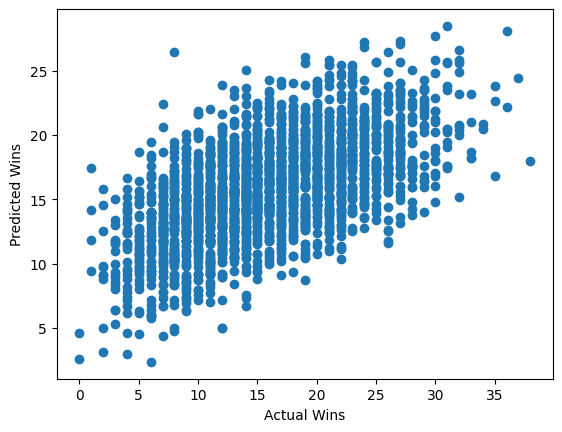

In [198]:
import matplotlib.pyplot as plt
plt.scatter(Y_train, y_pred_train)
plt.xlabel("Actual Wins")
plt.ylabel("Predicted Wins")
plt.show

In [199]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

model = LinearRegression()
model.fit(X, Y)

# Make predictions
predictions = model.predict(X)

r2 = r2_score(Y, predictions)
print(f'R-squared: {r2:.2f}')

R-squared: 0.35


In [200]:
X =df[['EFG_D']]
X
df['EFG_D'] = -df['EFG_D']
X
#Was made negative because we believe a lower absolute value of Effective Field Goal Percentage allowed is correlated with more wins which converting the data to a negative value would imply.

,EFG_D
0,-48.1
1,-47.7
2,-47.7
3,-43.0
4,-41.1
...,...
3518,-52.9
3519,-49.3
3520,-44.0
3521,-47.3


In [201]:
Y = df[['W']]
Y


,W
0,33
1,36
2,33
3,31
4,37
...,...
3518,27
3519,27
3520,28
3521,29


In [202]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test= train_test_split(X,Y, test_size=0.3, random_state=42)
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,Y_train)

LinearRegression()

In [203]:
C= lr.intercept_
C

array([81.85817174])

In [204]:
B=lr.coef_
B

array([[1.3157144]])

<function matplotlib.pyplot.show(close=None, block=None)>

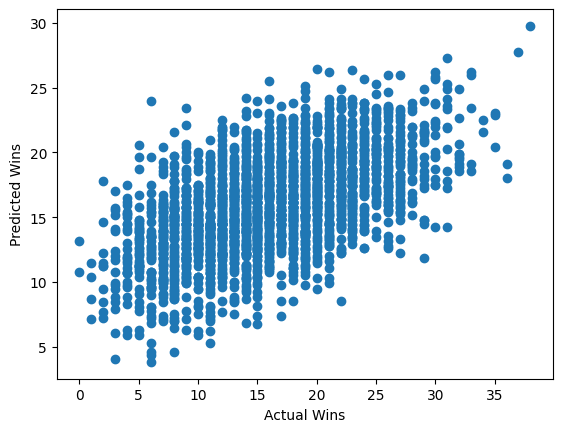

In [206]:
y_pred_train= lr.predict(X_train)
import matplotlib.pyplot as plt
plt.scatter(Y_train, y_pred_train)
plt.xlabel("Actual Wins")
plt.ylabel("Predicted Wins")
plt.show

In [207]:
from sklearn.metrics import r2_score
r2_score(Y_train, y_pred_train)

0.32962060962262596

In [208]:
X = df[['TOR','TORD']]
X
df['TOR'] = -df['TOR']
X
#Once again, TOR was made negative because we believe a lower absolute value TOR% would be correlated with more wins.

,TOR,TORD
0,-15.4,18.2
1,-12.4,15.8
2,-14.0,19.5
3,-17.7,22.8
4,-16.2,17.1
...,...,...
3518,-13.6,18.3
3519,-16.0,18.9
3520,-19.3,16.3
3521,-17.3,19.3


In [209]:
Y = df[['W']]
Y

,W
0,33
1,36
2,33
3,31
4,37
...,...
3518,27
3519,27
3520,28
3521,29


In [210]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test= train_test_split(X,Y, test_size=0.3, random_state=42)
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,Y_train)


LinearRegression()

In [211]:
C= lr.intercept_
C

array([31.80972412])

In [212]:
B=lr.coef_
B

array([[1.45883887, 0.61311218]])

In [213]:
y_pred_train= lr.predict(X_train)


<function matplotlib.pyplot.show(close=None, block=None)>

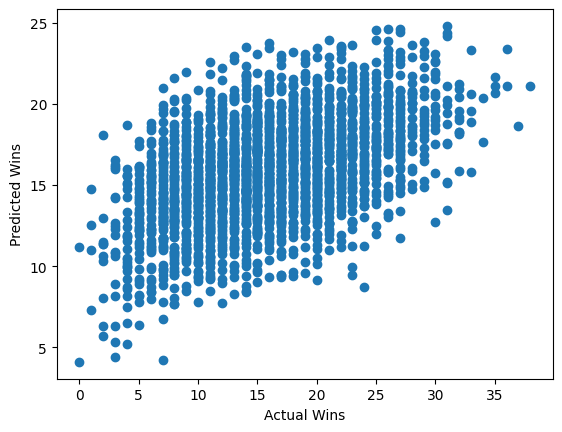

In [214]:
import matplotlib.pyplot as plt
plt.scatter(Y_train, y_pred_train)
plt.xlabel("Actual Wins")
plt.ylabel("Predicted Wins")
plt.show

In [215]:
from sklearn.metrics import r2_score
r2_score(Y_train, y_pred_train)

0.238533458129079

In [ ]:
alpha= 0.05
Z=(1/2)ln(1+r1/1-r1)
Z= 0.37070692499
Z2= 0.34240285025
n1=3523
n2=3523
Difference= 0.02830407474

In [170]:
from scipy.stats import ttest_rel

# Assuming differences is an array of differences between paired observations
differences = [0.02830407474]

# Perform a paired sample t-test
t_stat, p_value = ttest_rel([0.37070692499], [0.34240285025])



/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1103: RuntimeWarning: divide by zero encountered in divide
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero
/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1103: RuntimeWarning: invalid value encountered in double_scalars
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero


In [171]:
import numpy as np
from scipy.stats import t
import numpy as np
from scipy.stats import t

# Replace these values with your correlation coefficients
r1 = 0.35460968331830656
r2 = 0.32962060962262596

# Sample sizes (adjust as needed)
N = 3523

# Fisher transform the correlation coefficients
z1 = np.arctanh(r1)
z2 = np.arctanh(r2)

# Calculate the average of the Fisher-transformed correlation coefficients
z_avg = (z1 + z2) / 2

# Calculate the standard error of the difference
se_diff = np.sqrt((1 / (N - 3)) * (1 - 0.34211514647**2) / ((1 / (N - 3)) + (1 / (N - 3))))

# Calculate the t-statistic
t_statistic = (z1 - z2) / se_diff

df = N - 2

# Calculate the one-sided p-value
p_value_one_sided = t.sf(np.abs(t_statistic), df)

# Output results
print(f"Fisher-transformed Correlation 1: {z1}")
print(f"Fisher-transformed Correlation 2: {z2}")
print(f"One-sided t-statistic: {t_statistic}")
print(f"One-sided p-value: {p_value_one_sided}")

Fisher-transformed Correlation 1: 0.3707066796563081
Fisher-transformed Correlation 2: 0.3424025590908096
One-sided t-statistic: 0.042598551385004096
One-sided p-value: 0.48301198282908453
